In [ ]:
#Importação da bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/dados_limpos.csv"
dados = pd.read_csv(url, sep=",")

#dados = pd.read_csv(url, on_bad_lines="skip", sep=";") #lida com linhas com algum espaço vazio
dados.columns

Index(['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado',
       'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas',
       'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola',
       'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$',
       'Receitas_R$', 'Transferencias_correntes_R$',
       'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis',
       'povoamento', 'UF', 'Municipio', 'Regiao', 'PIB_PerCapita',
       'Densidade_Populacional', 'Proporcao_PessoalAssalariado',
       'Proporcao_Area_Plantada'],
      dtype='object')

 # **Impacto do PIB Municipal e das Transferências nas Finanças dos Municípios**


Neste tópico, foi realizada uma análise em relação ao PIB municipal, à receita e à dependência das transferências dos municípios. A partir dos dados disponíveis no dataset, foram investigados os impactos dessas variáveis na autonomia financeira das cidades. O estudo busca compreender como o desempenho econômico local influencia a dependência de transferências externas e o índice de autonomia financeira.

Inicialmente, para essa análise, foram criadas novas variáveis para auxiliar no processo. Para calcular uma estimativa da receita própria do município, que compreende os valores não dependentes dos repasses, foi criada a variável "Receita_Propria", a qual foi calculada subtraindo as transferências correntes e de capital das receitas totais. Em seguida, foram calculados o índice de dependência das transferências, que expressa a proporção das transferências em relação às receitas totais, e o índice de autonomia, que reflete a proporção da receita própria sobre as receitas totais. Para evitar divisões por zero, foram aplicadas condições que resultam em valores ausentes (NaN) quando necessário.

Por fim, foram geradas as estatísticas descritivas dessas variáveis, apresentando dados como PIB, receitas, transferências e índices de dependência e autonomia, com formatação de duas casas decimais e separador de milhares para melhor visualização.

## Análise estatística e descritiva dos dados

In [ ]:
import pandas as pd
import numpy as np

dados['Receita_Propria'] = dados['Receitas_R$'] - (dados['Transferencias_correntes_R$'] + dados['Transferencias_capital_R$'])

# Evitar divisão por zero e garantir que os valores sejam válidos
dados['Dependencia_Transferencias'] = np.where(
    (dados['Receitas_R$'] > 0) &
    ((dados['Transferencias_correntes_R$'] + dados['Transferencias_capital_R$']) >= 0),
    (dados['Transferencias_correntes_R$'] + dados['Transferencias_capital_R$']) / dados['Receitas_R$'] * 100,
    np.nan  # Caso contrário, o índice será NaN
)

dados['Indice_Autonomia'] = np.where(
    (dados['Receitas_R$'] > 0) & (dados['Receita_Propria'] > 0),
    (dados['Receita_Propria'] / dados['Receitas_R$']) * 100,
    np.nan
)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

estatisticas = dados[['PIB', 'Receitas_R$', 'Receita_Propria', 'Transferencias_correntes_R$', 'Transferencias_capital_R$', 'Dependencia_Transferencias', 'Indice_Autonomia']].describe()

estatisticas_formatadas = estatisticas.style \
    .format("{:,.2f}", na_rep="-") \
    .set_caption("Estatísticas Descritivas das Variáveis Financeiras")

estatisticas_formatadas


,PIB,Receitas_R$,Receita_Propria,Transferencias_correntes_R$,Transferencias_capital_R$,Dependencia_Transferencias,Indice_Autonomia
count,"33,420.00","33,420.00","33,420.00","33,420.00","33,420.00","22,247.00","22,067.00"
mean,"1,042,832.85","82,929,452.30","-2,850,515.57","83,698,274.38","2,081,693.49",79.64,21.09
std,"10,980,878.49","764,779,349.31","571,554,626.07","350,712,468.25","11,454,583.61",58.93,13.55
min,0.00,0.00,"-23,559,425,270.62",0.00,0.00,0.00,0.02
25%,"48,886.25",0.00,"-25,128,602.59","19,700,354.08","318,029.72",74.52,13.04
50%,"135,519.00","22,337,131.87","3,294,462.94","32,829,514.69","890,528.06",82.08,18.00
75%,"385,322.50","51,742,014.15","9,576,952.33","63,773,444.33","1,980,793.26",87.10,25.56
max,"763,597,808.00","64,853,086,202.24","45,769,209,411.92","22,902,292,290.93","837,672,008.56","8,597.94",100.00


Ao analisar as estatísticas descritivas, foram identificados valores altamente discrepantes, tanto excessivamente elevados quanto extremamente baixos, que pareciam não condizer com o esperado. Com o intuito de compreender melhor o que esses valores representam, foi realizada uma análise mais detalhada desses casos específicos.

Primeiramente, as estatísticas foram agrupadas por ano para verificar a presença de padrões. Em seguida, os valores foram analisados individualmente, de forma isolada, para uma compreensão mais aprofundada.

In [ ]:
import pandas as pd
import numpy as np

dados['Receita_Propria'] = dados['Receitas_R$'] - (dados['Transferencias_correntes_R$'] + dados['Transferencias_capital_R$'])

# Evitar divisão por zero e garantir que os valores sejam válidos
dados['Dependencia_Transferencias'] = np.where(
    (dados['Receitas_R$'] > 0) &
    ((dados['Transferencias_correntes_R$'] + dados['Transferencias_capital_R$']) >= 0),
    (dados['Transferencias_correntes_R$'] + dados['Transferencias_capital_R$']) / dados['Receitas_R$'] * 100,
    np.nan  # Caso contrário, o índice será NaN
)

dados['Indice_Autonomia'] = np.where(
    (dados['Receitas_R$'] > 0) & (dados['Receita_Propria'] > 0),
    (dados['Receita_Propria'] / dados['Receitas_R$']) * 100,
    np.nan
)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


estatisticas_por_ano = dados.groupby('Ano')[
    ['PIB', 'Receitas_R$', 'Receita_Propria', 'Transferencias_correntes_R$', 'Transferencias_capital_R$', 'Dependencia_Transferencias', 'Indice_Autonomia']
].describe().transpose()

estatisticas_por_ano_formatadas = estatisticas_por_ano.style \
    .format("{:,.2f}", na_rep="-") \
    .set_caption("Estatísticas Descritivas das Variáveis Financeiras por Ano")

estatisticas_por_ano_formatadas


Após a observação das estatísticas descritivas ao longo dos anos, foi possível identificar que, em todos os anos analisados, os valores mínimos de receita própria eram negativos, indicando que o município recebeu mais repasses do que arrecadou. Além disso, foi notado que não foram disponibilizados dados de receitas nos anos de 2020 e 2021, o que impossibilitou o cálculo da dependência de transferências e da autonomia financeira, além de prejudicar futuras análises gráficas dessas variáveis.

Por fim, também foram observados valores discrepantes nas variáveis de dependência de transferências, receitas próprias e transferências, os quais foram analisados em busca de uma melhor compreensão.

A fim de compreender melhor os municípios de cada ano que apresentaram receita própria negativa, foi realizada uma análise desses casos. Ao observar os dados, foi possível notar que, em alguns casos, os valores negativos ocorreram porque a coluna de receita não continha valores, especialmente nos anos de 2020 e 2021. No entanto, na maioria das situações, o repasse foi significativamente maior do que o valor arrecadado. Nesses casos, o comportamento se repetiu nos anos subsequentes, com os valores das transferências seguindo um padrão consistente.

Por fim, o caso mais notável foi o município de Jataizinho, que, em 2017, registrou quase 3 trilhões de reais em transferências correntes, apresentando um valor extremamente negativo de receita própria e um alto índice de dependência.

In [ ]:
import pandas as pd
from IPython.display import display

dados['Receita_Propria'] = dados['Receitas_R$'] - (dados['Transferencias_correntes_R$'] + dados['Transferencias_capital_R$'])

for ano in sorted(dados['Ano'].unique()):
    grupo_ano = dados[dados['Ano'] == ano]

    # Encontrar o município com a menor Receita Própria no ano
    menor_receita = grupo_ano.loc[grupo_ano['Receita_Propria'].idxmin()]
    municipio_nome = menor_receita['Municipio']
    municipio_id = menor_receita['CDMunicipio']

    dados_municipio = dados[dados['CDMunicipio'] == municipio_id]

    colunas = ['Ano', 'Populacao', 'Area', 'Receitas_R$', 'Transferencias_correntes_R$', 'Transferencias_capital_R$', 'Receita_Propria']
    tabela = dados_municipio[colunas].sort_values('Ano')

    tabela_formatada = tabela.style.format({
        'Receitas_R$': "R$ {:,.2f}",
        'Receita_Propria': "R$ {:,.2f}",
        'Transferencias_correntes_R$': "R$ {:,.2f}",
        'Transferencias_capital_R$': "R$ {:,.2f}",
        'Populacao': "{:,}",
        'Area': "{:,.2f}"
    }).set_caption(f"Receitas e Transferências do Município com Menor Receita Própria em {ano}: {municipio_nome}")

    display(tabela_formatada)


,Ano,Populacao,Area,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,Receita_Propria
17018,2016,"31,353.0","1,187.80","R$ 93,833,923.10","R$ 140,098,854.27","R$ 101,255.52","R$ -46,366,186.69"
25642,2017,"31,574.0","1,187.80","R$ 93,728,529.24","R$ 71,330,267.82",R$ 0.00,"R$ 22,398,261.42"
16221,2018,"30,849.0","1,187.80","R$ 108,916,971.38","R$ 79,900,276.28","R$ 2,374,396.73","R$ 26,642,298.37"
16103,2019,"31,063.0","1,187.80","R$ 110,595,286.23","R$ 82,841,545.81","R$ 1,266,000.00","R$ 26,487,740.42"
31433,2020,"31,273.0","1,187.80",R$ 0.00,"R$ 86,594,862.96","R$ 250,040.09","R$ -86,844,903.05"
31438,2021,"31,479.0","1,187.80",R$ 0.00,"R$ 100,925,880.04","R$ 1,815,216.51","R$ -102,741,096.55"


,Ano,Populacao,Area,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,Receita_Propria
21962,2016,"12,560.0",159.20,"R$ 33,843,753.98",R$ 0.00,R$ 0.00,"R$ 33,843,753.98"
18698,2017,"12,615.0",159.20,"R$ 32,737,794.46","R$ 2,814,348,727.67","R$ 426,300.00","R$ -2,782,037,233.21"
20018,2018,"12,536.0",159.20,"R$ 35,608,307.08","R$ 17,856,535.60",R$ 0.00,"R$ 17,751,771.48"
7150,2019,"12,588.0",159.20,"R$ 41,516,824.78","R$ 28,282,496.53","R$ 656,099.75","R$ 12,578,228.50"
29499,2020,"12,638.0",159.20,R$ 0.00,"R$ 30,825,563.56","R$ 409,078.14","R$ -31,234,641.70"
32213,2021,"12,687.0",159.20,R$ 0.00,"R$ 31,119,260.14","R$ 662,123.10","R$ -31,781,383.24"


,Ano,Populacao,Area,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,Receita_Propria
847,2016,"42,358.0",502.50,"R$ 148,644,344.68","R$ 99,382,598.59","R$ 595,441.01","R$ 48,666,305.08"
2943,2017,"42,904.0",502.50,"R$ 143,426,554.84","R$ 99,034,941.14","R$ 156,759.00","R$ 44,234,854.70"
4361,2018,"43,774.0",502.50,"R$ 156,746,722.81","R$ 261,926,616.47","R$ 2,028,188.80","R$ -107,208,082.46"
6590,2019,"44,380.0",502.50,"R$ 162,476,111.64","R$ 118,711,847.54","R$ 1,160,225.00","R$ 42,604,039.10"
9084,2020,"44,970.0",502.50,R$ 0.00,"R$ 128,083,895.13","R$ 913,690.47","R$ -128,997,585.60"
11468,2021,"45,544.0",502.50,R$ 0.00,"R$ 153,123,248.04","R$ 1,214,688.34","R$ -154,337,936.38"


,Ano,Populacao,Area,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,Receita_Propria
234,2016,"38,301.0",135.40,"R$ 188,334,408.34","R$ 138,812,003.24",R$ 0.00,"R$ 49,522,405.10"
2333,2017,"38,670.0",135.40,"R$ 188,911,640.83","R$ 148,518,461.03","R$ 400,000.00","R$ 39,993,179.80"
4461,2018,"38,108.0",135.40,"R$ 198,346,315.67","R$ 159,522,995.39","R$ 3,582,425.40","R$ 35,240,894.88"
6507,2019,"38,499.0",135.40,"R$ 196,719,704.91","R$ 326,299,252.10","R$ 2,758,074.22","R$ -132,337,621.41"
8555,2020,"38,883.0",135.40,R$ 0.00,"R$ 272,203,548.27","R$ 1,080,002.00","R$ -273,283,550.27"
10964,2021,"39,259.0",135.40,R$ 0.00,"R$ 365,355,302.91","R$ 1,679,787.00","R$ -367,035,089.91"


,Ano,Populacao,Area,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,Receita_Propria
2043,2016,"12,038,175.0","1,523.30","R$ 54,332,823,383.31","R$ 15,466,564,737.22","R$ 806,997,117.23","R$ 38,059,261,528.86"
4116,2017,"12,106,920.0","1,523.30","R$ 57,617,557,295.38","R$ 16,065,442,056.40","R$ 642,087,073.96","R$ 40,910,028,165.02"
6178,2018,"12,176,866.0","1,523.30","R$ 56,682,197,972.94","R$ 17,191,856,011.69","R$ 712,036,621.48","R$ 38,778,305,339.77"
8368,2019,"12,252,023.0","1,523.30","R$ 64,853,086,202.24","R$ 18,498,539,693.43","R$ 585,337,096.89","R$ 45,769,209,411.92"
10623,2020,"12,325,232.0","1,523.30",R$ 0.00,"R$ 20,953,788,271.26","R$ 749,721,695.22","R$ -21,703,509,966.48"
13038,2021,"12,396,372.0","1,523.30",R$ 0.00,"R$ 22,902,292,290.93","R$ 657,132,979.69","R$ -23,559,425,270.62"


,Ano,Populacao,Area,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,Receita_Propria
2043,2016,"12,038,175.0","1,523.30","R$ 54,332,823,383.31","R$ 15,466,564,737.22","R$ 806,997,117.23","R$ 38,059,261,528.86"
4116,2017,"12,106,920.0","1,523.30","R$ 57,617,557,295.38","R$ 16,065,442,056.40","R$ 642,087,073.96","R$ 40,910,028,165.02"
6178,2018,"12,176,866.0","1,523.30","R$ 56,682,197,972.94","R$ 17,191,856,011.69","R$ 712,036,621.48","R$ 38,778,305,339.77"
8368,2019,"12,252,023.0","1,523.30","R$ 64,853,086,202.24","R$ 18,498,539,693.43","R$ 585,337,096.89","R$ 45,769,209,411.92"
10623,2020,"12,325,232.0","1,523.30",R$ 0.00,"R$ 20,953,788,271.26","R$ 749,721,695.22","R$ -21,703,509,966.48"
13038,2021,"12,396,372.0","1,523.30",R$ 0.00,"R$ 22,902,292,290.93","R$ 657,132,979.69","R$ -23,559,425,270.62"


Ao observar as estatísticas descritivas da variável dependência de transferências, foi possível notar valores que ultrapassavam o valor máximo esperado de 100%. Dessa forma, foi realizada uma análise específica para entender melhor esses resultados e determinar a melhor maneira de lidar com eles.

Foi possível observar que as cidades que apresentaram um valor exorbitante de dependência financeira ao longo dos anos foram aquelas que receberam uma quantidade de repasses extremamente alta, muito superior às suas receitas, o que resultou nesse comportamento. Também foi notado que a maioria desses valores ocorreu em apenas um ano, embora os municípios apresentassem grande dependência nos outros anos, porém dentro dos limites esperados. Esse fato é relevante, considerando que todos esses municípios têm uma população relativamente pequena, com no máximo 13 mil habitantes.

Por fim, foi observado novamente o município de Jataizinho, que se destacou devido ao valor extremamente alto de repasse no ano de 2017, o que resultou no maior índice de dependência de todos os anos analisados.

In [ ]:
import pandas as pd
from IPython.display import display

for ano in sorted(dados['Ano'].unique()):
    grupo_ano = dados[dados['Ano'] == ano]

    grupo_ano_validos = grupo_ano.dropna(subset=['Dependencia_Transferencias'])

    if not grupo_ano_validos.empty:
        # Encontrar o município com a maior Dependência de Transferências no ano
        municipio_com_max_dependencia = grupo_ano_validos.loc[grupo_ano_validos['Dependencia_Transferencias'].idxmax()]
        municipio_nome = municipio_com_max_dependencia['Municipio']
        municipio_id = municipio_com_max_dependencia['CDMunicipio']

        # Filtrar dados desse município para os anos disponíveis
        dados_municipio = dados[dados['CDMunicipio'] == municipio_id]


        colunas = ['Ano', 'Populacao', 'Area', 'Receitas_R$', 'Transferencias_correntes_R$', 'Transferencias_capital_R$', 'Receita_Propria', 'Dependencia_Transferencias']
        tabela = dados_municipio[colunas].sort_values('Ano')


        tabela_formatada = tabela.style.format({
            'Receitas_R$': "R$ {:,.2f}",
            'Receita_Propria': "R$ {:,.2f}",
            'Transferencias_correntes_R$': "R$ {:,.2f}",
            'Transferencias_capital_R$': "R$ {:,.2f}",
            'Populacao': "{:,}",
            'Area': "{:,.2f}",
            'Dependencia_Transferencias': "{:,.2f}"
        }).set_caption(f"Maior Dependência Financeira do Município em {ano}: {municipio_nome}")


        display(tabela_formatada)
    else:
        print(f"Nenhum dado válido encontrado para o ano {ano}.")


,Ano,Populacao,Area,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,Receita_Propria,Dependencia_Transferencias
23134,2016,"5,615.0","1,060.20","R$ 22,291,593.67","R$ 59,626,062.12","R$ 536,691.82","R$ -37,871,160.27",269.89
23029,2017,"5,731.0","1,060.20","R$ 21,242,785.49",R$ 0.00,R$ 0.00,"R$ 21,242,785.49",0.00
23007,2018,"6,026.0","1,060.20","R$ 21,553,623.97","R$ 18,428,792.58",R$ 0.00,"R$ 3,124,831.39",85.50
27400,2019,"6,171.0","1,060.20","R$ 21,744,069.55","R$ 19,064,271.67",R$ 0.00,"R$ 2,679,797.88",87.68
32105,2020,"6,312.0","1,060.20",R$ 0.00,"R$ 21,845,154.04","R$ 369,227.28","R$ -22,214,381.32",nan
30662,2021,"6,451.0","1,060.20",R$ 0.00,"R$ 25,519,960.77","R$ 338,657.76","R$ -25,858,618.53",nan


,Ano,Populacao,Area,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,Receita_Propria,Dependencia_Transferencias
21962,2016,"12,560.0",159.20,"R$ 33,843,753.98",R$ 0.00,R$ 0.00,"R$ 33,843,753.98",0.00
18698,2017,"12,615.0",159.20,"R$ 32,737,794.46","R$ 2,814,348,727.67","R$ 426,300.00","R$ -2,782,037,233.21","8,597.94"
20018,2018,"12,536.0",159.20,"R$ 35,608,307.08","R$ 17,856,535.60",R$ 0.00,"R$ 17,751,771.48",50.15
7150,2019,"12,588.0",159.20,"R$ 41,516,824.78","R$ 28,282,496.53","R$ 656,099.75","R$ 12,578,228.50",69.70
29499,2020,"12,638.0",159.20,R$ 0.00,"R$ 30,825,563.56","R$ 409,078.14","R$ -31,234,641.70",nan
32213,2021,"12,687.0",159.20,R$ 0.00,"R$ 31,119,260.14","R$ 662,123.10","R$ -31,781,383.24",nan


,Ano,Populacao,Area,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,Receita_Propria,Dependencia_Transferencias
19958,2016,"6,512.0",399.70,"R$ 26,319,602.28","R$ 19,739,720.46","R$ 1,951,406.60","R$ 4,628,475.22",82.41
22903,2017,"6,485.0",399.70,"R$ 26,009,408.17","R$ 19,802,300.26","R$ 2,100,198.69","R$ 4,106,909.22",84.21
20148,2018,"6,254.0",399.70,"R$ 27,168,442.73","R$ 68,093,189.80","R$ 2,308,728.02","R$ -43,233,475.09",259.13
27603,2019,"6,206.0",399.70,"R$ 24,851,107.69","R$ 20,293,255.44","R$ 147,930.00","R$ 4,409,922.25",82.25
29506,2020,"6,160.0",399.70,R$ 0.00,"R$ 24,931,767.96","R$ 623,870.00","R$ -25,555,637.96",nan
33001,2021,"6,115.0",399.70,R$ 0.00,"R$ 27,698,512.70","R$ 333,915.00","R$ -28,032,427.70",nan


,Ano,Populacao,Area,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,Receita_Propria,Dependencia_Transferencias
20486,2016,"7,853.0",120.10,"R$ 20,221,162.70","R$ 16,128,026.52","R$ 496,680.00","R$ 3,596,456.18",82.21
21678,2017,"7,819.0",120.10,"R$ 20,306,267.25","R$ 16,019,449.18","R$ 1,020,425.00","R$ 3,266,393.07",83.91
24973,2018,"7,553.0",120.10,"R$ 19,007,572.42","R$ 16,212,954.37","R$ 558,975.00","R$ 2,235,643.05",88.24
15637,2019,"7,498.0",120.10,"R$ 21,514,928.95","R$ 111,733,453.00",R$ 0.00,"R$ -90,218,524.05",519.33
31329,2020,"7,444.0",120.10,R$ 0.00,"R$ 22,224,750.90","R$ 254,978.00","R$ -22,479,728.90",nan
29308,2021,"7,393.0",120.10,R$ 0.00,"R$ 24,735,776.38","R$ 3,479,231.08","R$ -28,215,007.46",nan


Nenhum dado válido encontrado para o ano 2020.
Nenhum dado válido encontrado para o ano 2021.


Também foi realizada uma análise dos municípios com maior receita própria, sendo que o resultado indicou São Paulo, o que faz sentido, considerando que é o município com a maior população do Brasil. Isso reflete, portanto, nos valores elevados de transferências recebidas.

In [ ]:
import pandas as pd

dados['Receita_Propria'] = dados['Receitas_R$'] - (dados['Transferencias_correntes_R$'] + dados['Transferencias_capital_R$'])

menor_receita = dados.loc[dados['Receita_Propria'].idxmax()]
municipio_nome = menor_receita['Municipio']


dados_municipio = dados[dados['Municipio'] == municipio_nome]


colunas = ['PIB','Ano', 'Populacao', 'Area', 'Receitas_R$', 'Transferencias_correntes_R$', 'Transferencias_capital_R$', 'Receita_Propria']
tabela = dados_municipio[colunas].sort_values('Ano')


tabela_formatada = tabela.style.format({
    'PIB': "R$ {:,.2f}",
    'Receitas_R$': "R$ {:,.2f}",
    'Receita_Propria': "R$ {:,.2f}",
    'Transferencias_correntes_R$': "R$ {:,.2f}",
    'Transferencias_capital_R$': "R$ {:,.2f}",
    'Populacao': "{:,}",
    'Area': "{:,.2f}"
}).set_caption(f"Receitas e Transferências do Município: {municipio_nome}")


tabela_formatada


,PIB,Ano,Populacao,Area,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,Receita_Propria
2043,"R$ 683,066,697.00",2016,"12,038,175.0","1,523.30","R$ 54,332,823,383.31","R$ 15,466,564,737.22","R$ 806,997,117.23","R$ 38,059,261,528.86"
4116,"R$ 698,952,189.00",2017,"12,106,920.0","1,523.30","R$ 57,617,557,295.38","R$ 16,065,442,056.40","R$ 642,087,073.96","R$ 40,910,028,165.02"
6178,"R$ 714,663,604.00",2018,"12,176,866.0","1,523.30","R$ 56,682,197,972.94","R$ 17,191,856,011.69","R$ 712,036,621.48","R$ 38,778,305,339.77"
8368,"R$ 763,597,808.00",2019,"12,252,023.0","1,523.30","R$ 64,853,086,202.24","R$ 18,498,539,693.43","R$ 585,337,096.89","R$ 45,769,209,411.92"
10623,"R$ 748,759,007.00",2020,"12,325,232.0","1,523.30",R$ 0.00,"R$ 20,953,788,271.26","R$ 749,721,695.22","R$ -21,703,509,966.48"
13038,R$ 0.00,2021,"12,396,372.0","1,523.30",R$ 0.00,"R$ 22,902,292,290.93","R$ 657,132,979.69","R$ -23,559,425,270.62"


## Análise gráfica dos dados

A partir dos resultados encontrados na estatística descritiva, neste tópico serão apresentados alguns gráficos baseados nos dados analisados e nos resultados obtidos, com o objetivo de compreender suas correlações e iniciar o processo de resposta à pergunta levantada.

**Pergunta: Existe relação entre maior PIB municipal, maior receita própria e menor dependência de transferências correntes e de capital, e o índice de autonomia financeira nos municípios?**

### Gráficos do PIB

A seguir serão apresentados gráficos relacionados ao PIB e suas relações com outras variáveis

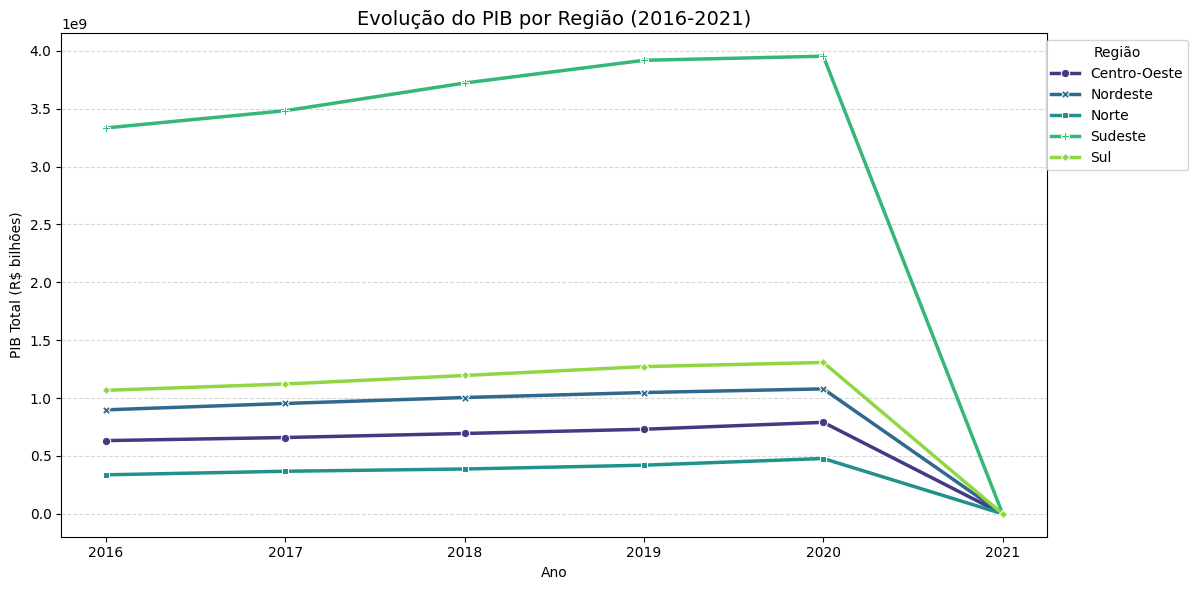

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar PIB total por região e ano
pib_regiao = dados.groupby(['Regiao', 'Ano'])['PIB'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=pib_regiao,
    x='Ano',
    y='PIB',
    hue='Regiao',
    style='Regiao',
    markers=True,
    dashes=False,
    linewidth=2.5,
    palette='viridis'
)
plt.title('Evolução do PIB por Região (2016-2021)', fontsize=14)
plt.ylabel('PIB Total (R$ bilhões)')
plt.xlabel('Ano')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Região', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

É possível observar um crescimento gradual em todas as regiões de 2016 a 2020, com o Sudeste liderando por ampla margem. Entretanto, como visto nas análises descritivas não foram fornecidos dados do PIB no ano de 2021, causando uma queda brusca no gráfico.

<ipython-input-92-34a7e0ac8b22>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues')
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


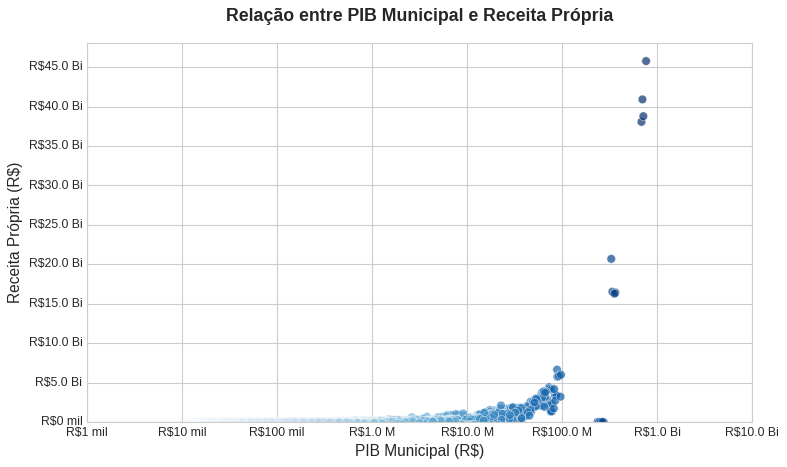

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

x = dados['PIB']
y = dados['Receita_Propria']

cmap = plt.cm.get_cmap('Blues')

scatter = plt.scatter(
    x, y,
    alpha=0.7,
    s=60,
    c=np.log10(x),
    cmap=cmap,
    edgecolor='white',
    linewidth=0.5
)

plt.xscale('log')

plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'R${x/1e9:.1f} Bi' if x >= 1e9 else (f'R${x/1e6:.1f} M' if x >= 1e6 else f'R${x/1e3:.0f} mil'))
)
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'R${x/1e9:.1f} Bi' if x >= 1e9 else (f'R${x/1e6:.1f} M' if x >= 1e6 else f'R${x/1e3:.0f} mil'))
)
plt.gca().yaxis.set_major_locator(MultipleLocator(base=5e9))

plt.title('Relação entre PIB Municipal e Receita Própria', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('PIB Municipal (R$)', fontsize=14)
plt.ylabel('Receita Própria (R$)', fontsize=14)

plt.ylim(0, max(y) * 1.05)

plt.tight_layout()

plt.show()


O gráfico mostra uma correlação positiva entre PIB Municipal e Receita Própria, revelando que municípios com maior PIB conseguem gerar mais receita própria. A distribuição dos dados indica grande desigualdade entre os municípios brasileiros, com a maioria concentrada em valores baixos (abaixo de R$100 milhões) e poucos alcançando patamares superiores a R\$1 bilhão, tanto em PIB quanto em receita.

<ipython-input-93-595b4462ab58>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues')
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


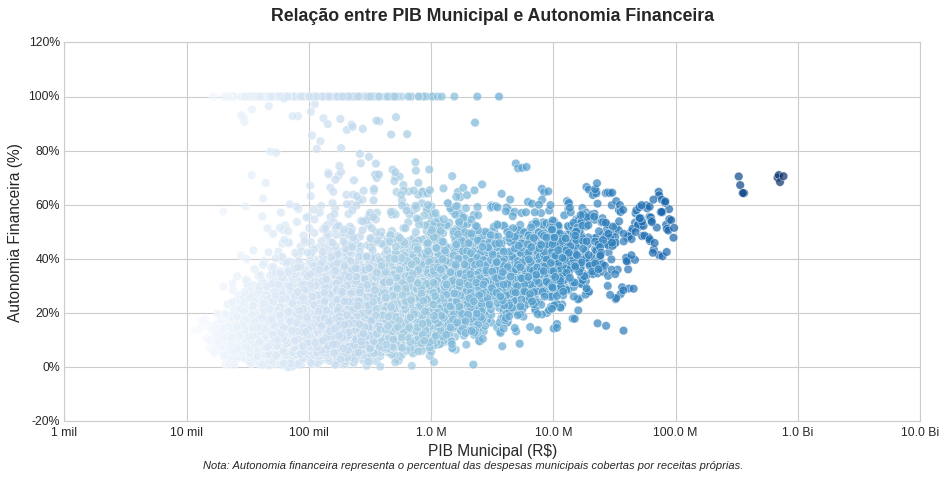

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

x = dados['PIB']
y = dados['Indice_Autonomia']

cmap = plt.cm.get_cmap('Blues')

scatter = plt.scatter(
    x, y,
    alpha=0.7,
    s=60,
    c=np.log10(x),
    cmap=cmap,
    edgecolor='white',
    linewidth=0.5
)

plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.1f} Bi' if x >= 1e9 else (f'{x/1e6:.1f} M' if x >= 1e6 else f'{x/1e3:.0f} mil')))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}%'))

plt.title('Relação entre PIB Municipal e Autonomia Financeira', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('PIB Municipal (R$)', fontsize=14)
plt.ylabel('Autonomia Financeira (%)', fontsize=14)

plt.figtext(0.5, 0.01,
           "Nota: Autonomia financeira representa o percentual das despesas municipais cobertas por receitas próprias.",
           ha="center", fontsize=10, style='italic')

plt.tight_layout()

plt.show()


O gráfico demonstra padrões mais consistentes quando desconsideramos os valores extremos de 100% (outliers causados pela falta de registro de transferências em alguns municípios). A tendência geral indica que municípios com maior PIB tendem a apresentar maior autonomia financeira, porém com grandes variações. A maioria dos municípios se concentra com PIB entre R$10 mil e R$100 milhões, com autonomia financeira tipicamente entre 10% e 60%. Os dados revelam a realidade da dependência fiscal da maioria dos municípios brasileiros, onde mesmo aqueles com economia relativamente desenvolvida raramente ultrapassam 70% de autonomia financeira, evidenciando a forte dependência de transferências intergovernamentais

<ipython-input-94-6e0de19288a4>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues')
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


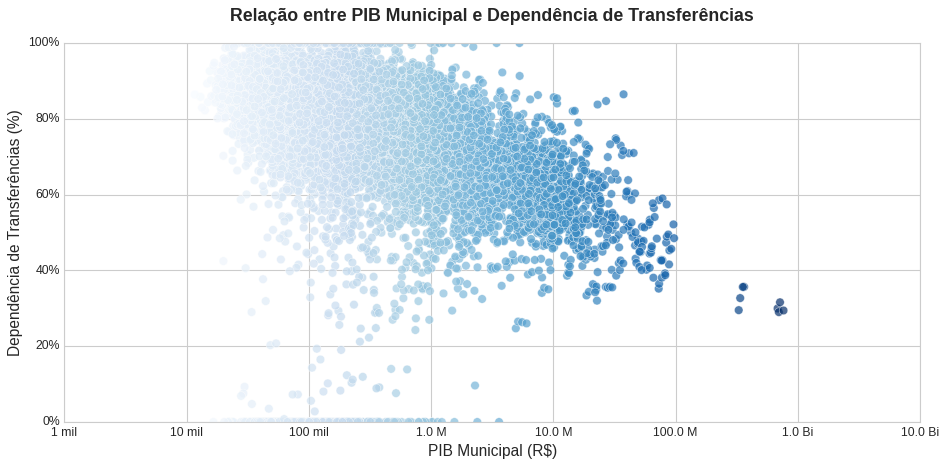

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

x = dados['PIB']
y = dados['Dependencia_Transferencias']
y_filtered = np.clip(y, 0, 100)

cmap = plt.cm.get_cmap('Blues')

scatter = plt.scatter(
    x, y_filtered,
    alpha=0.7,
    s=60,
    c=np.log10(x),
    cmap=cmap,
    edgecolor='white',
    linewidth=0.5
)

plt.xscale('log')
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.1f} Bi' if x >= 1e9 else (f'{x/1e6:.1f} M' if x >= 1e6 else f'{x/1e3:.0f} mil'))
)
plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x:.0f}%')
)

plt.title('Relação entre PIB Municipal e Dependência de Transferências', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('PIB Municipal (R$)', fontsize=14)
plt.ylabel('Dependência de Transferências (%)', fontsize=14)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()


O gráfico apresenta uma tendência de correlação negativa: quanto maior o PIB, menor tende a ser a dependência de transferências. A maioria dos municípios com PIB entre R\$100 mil e R\$10 milhões apresenta alta dependência (60-100%), enquanto municípios com PIB acima de R\$100 milhões tendem a mostrar dependência entre 30% e 70%. Alguns pontos próximos a 0% de dependência representam outliers causados pela ausência de registro de transferências recebidas. Os poucos municípios com PIB próximo a R$1 bilhão mostram dependência significativamente menor (25-35%), evidenciando que maior capacidade econômica contribui para maior autonomia financeira, embora a maioria dos municípios brasileiros ainda mantenha considerável dependência de transferências intergovernamentais.

### Gráficos sobre Autonomia Financeira

Nesse espaço serão mostrados os gŕaficos referentes a autonomia financeira

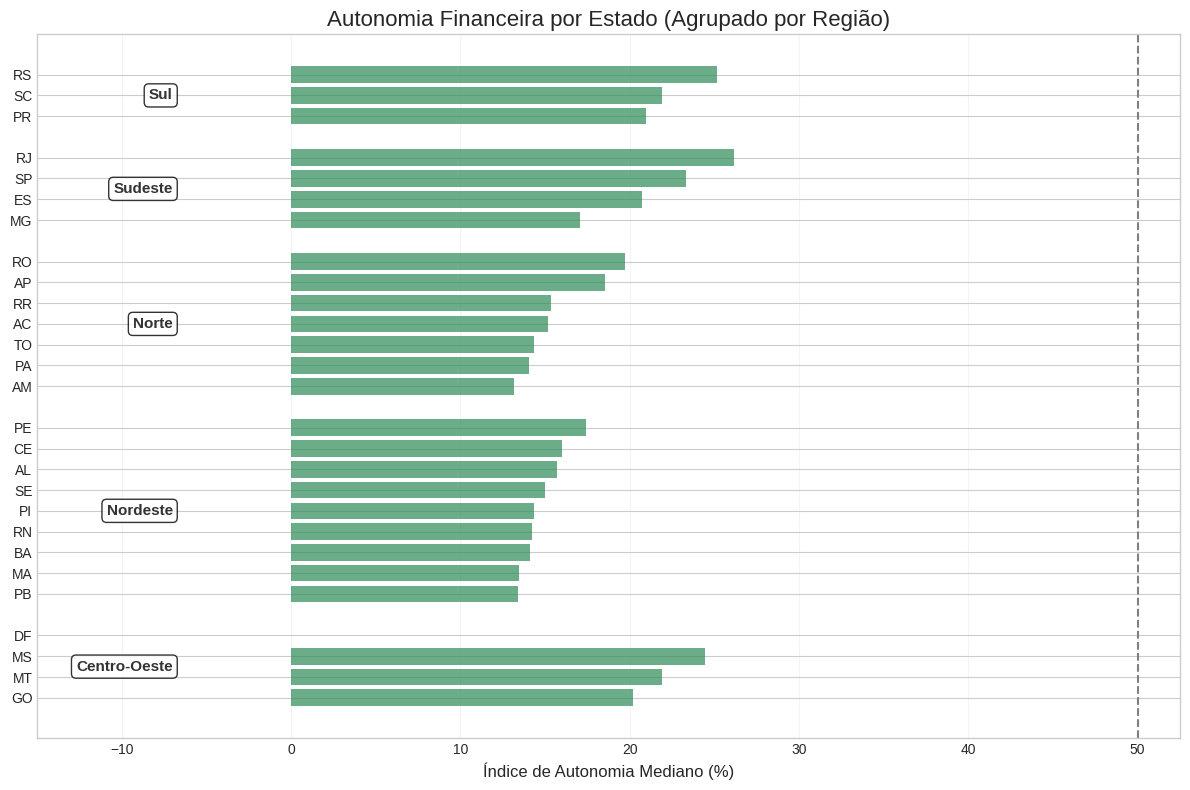

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


autonomia_uf_regiao = dados.groupby(['Regiao', 'UF'])['Indice_Autonomia'].median().reset_index()
autonomia_uf_regiao = autonomia_uf_regiao.sort_values(['Regiao', 'Indice_Autonomia'])


regioes = autonomia_uf_regiao['Regiao'].unique()
espaco = 1

y_pos = []
current_pos = 0
for regiao in regioes:
    ufs_regiao = autonomia_uf_regiao[autonomia_uf_regiao['Regiao'] == regiao]
    n_ufs = len(ufs_regiao)
    y_pos.extend(np.arange(current_pos, current_pos + n_ufs))
    current_pos += n_ufs + espaco

plt.figure(figsize=(12, 8))
bars = plt.barh(
    y=y_pos[:len(autonomia_uf_regiao)],
    width=autonomia_uf_regiao['Indice_Autonomia'],
    color='#2e8b57',
    alpha=0.7,
    height=0.8
)

for regiao in regioes:
    mask = autonomia_uf_regiao['Regiao'] == regiao
    indices = np.where(mask)[0]
    if len(indices) > 0:
        y_min = y_pos[indices[0]]
        y_max = y_pos[indices[-1]]
        y_center = (y_min + y_max) / 2

        plt.text(
            x=-7,
            y=y_center,
            s=regiao,
            ha='right',
            va='center',
            fontsize=11,
            fontweight='bold',
            color='#333333',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3')
        )

plt.yticks(
    ticks=y_pos[:len(autonomia_uf_regiao)],
    labels=autonomia_uf_regiao['UF'],
    fontsize=10
)

plt.title('Autonomia Financeira por Estado (Agrupado por Região)', fontsize=16)
plt.xlabel('Índice de Autonomia Mediano (%)', fontsize=12)
plt.ylabel('')
plt.axvline(x=50, color='gray', linestyle='--', label='50% Autonomia')
plt.xlim(left=-15)
plt.grid(axis='x', alpha=0.2)

plt.subplots_adjust(left=0.25)
plt.tight_layout()
plt.show()

Ao se analisar o gráfico, oserva-se que os estados das regiões Sul e Sudeste, junto com alguns estados do Centro-Oeste, apresentam os maiores índices de autonomia financeira. Em contraste, os estados do Nordeste e Norte geralmente apresentam índices mais baixos. Esta distribuição evidencia a desigualdade regional brasileira, com estados mais desenvolvidos economicamente demonstrando maior capacidade de autofinanciamento, enquanto estados menos desenvolvidos permanecem mais dependentes de transferências governamentais.

<ipython-input-161-fa0239943dff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


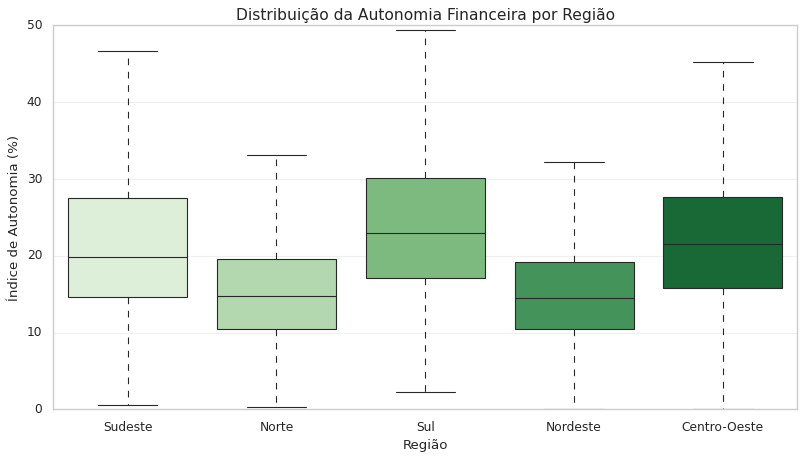

In [161]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=dados,
    x='Regiao',
    y='Indice_Autonomia',
    palette='Greens',
    showfliers=False  # Remove outliers para melhor visualização
)
plt.title('Distribuição da Autonomia Financeira por Região', fontsize=14)
plt.xlabel('Região')
plt.ylabel('Índice de Autonomia (%)')
plt.axhline(y=50, color='red', linestyle='--')
plt.grid(axis='y', alpha=0.3)

É posśivel observar que a região Sul mostra a maior mediana e também a maior concentração de valores no quartil superior, indicando melhor autonomia financeira nos seus municípios. O Centro-Oeste apresenta uma mediana próxima de 22%, com distribuição relativamente equilibrada. O Sudeste mostra uma mediana em torno de 20%, mas com grande amplitude de valores, sugerindo maior heterogeneidade entre seus municípios. As regiões Norte e Nordeste exibem as menores medianas, confirmando sua maior dependência de transferências governamentais. Notam-se também alguns valores extremos em todas as regiões, particularmente no Sul e Sudeste, onde alguns municípios alcançam autonomia próxima de 50%. Esta análise reforça o padrão de desigualdade regional no Brasil, onde as regiões Sul, Sudeste e Centro-Oeste demonstram maior capacidade de autofinanciamento em comparação às regiões Norte e Nordeste.

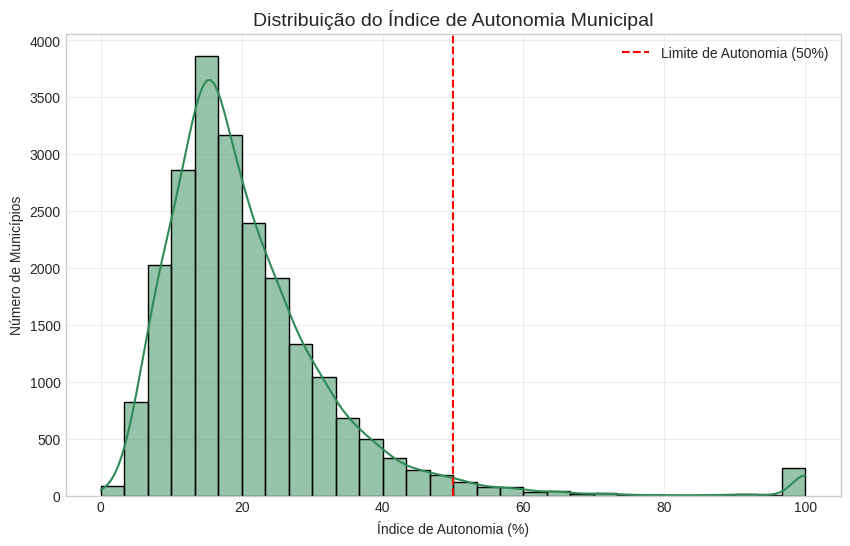

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=dados,
    x='Indice_Autonomia',
    bins=30,
    kde=True,
    color='#2e8b57'
)
plt.axvline(x=50, color='red', linestyle='--', label='Limite de Autonomia (50%)')
plt.title('Distribuição do Índice de Autonomia Municipal', fontsize=14)
plt.xlabel('Índice de Autonomia (%)')
plt.ylabel('Número de Municípios')
plt.legend()
plt.grid(alpha=0.3)

A análise do gráfico revela que a grande maioria dos municípios brasileiros possui baixa autonomia, com índices concentrados entre 10% e 25%. Apenas uma pequena parcela consegue ultrapassar o limite de 50% (linha vermelha), e um número ainda menor alcança níveis próximos a 100%. Isso indica um cenário de forte dependência da maioria dos municípios em relação a transferências de recursos de outras esferas governamentais, contrastando com poucos municípios que conseguem manter maior independência financeira e administrativa.

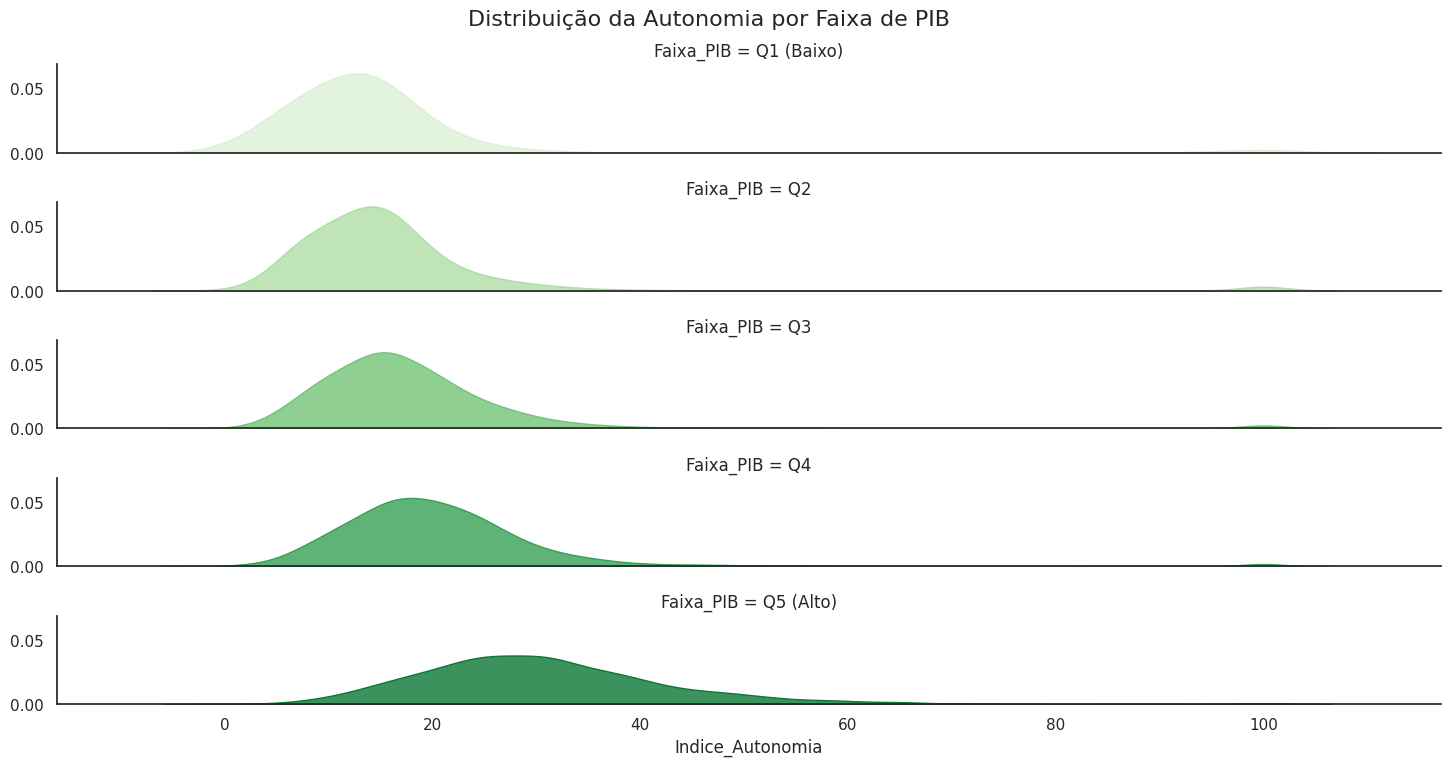

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar faixas de PIB
dados['Faixa_PIB'] = pd.qcut(dados['PIB'], q=5, labels=['Q1 (Baixo)', 'Q2', 'Q3', 'Q4', 'Q5 (Alto)'])

# Plot
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(
    dados,
    row='Faixa_PIB',
    hue='Faixa_PIB',
    aspect=10,
    height=1.5,
    palette='Greens'
)
g.map(sns.kdeplot, 'Indice_Autonomia', fill=True, alpha=0.8)
g.fig.suptitle('Distribuição da Autonomia por Faixa de PIB', y=1.02, fontsize=16)
g.set(ylabel="")

É possível observar que à medida que o PIB municipal aumenta, a autonomia financeira também cresce gradualmente. Municípios mais pobres (Q1-Q2) concentram-se em baixos níveis de autonomia, enquanto os mais ricos (Q5) atingem níveis moderados. Conclui-se que, embora exista uma relação positiva entre capacidade econômica e autonomia, mesmo os municípios mais ricos raramente alcançam altos níveis de independência financeira.

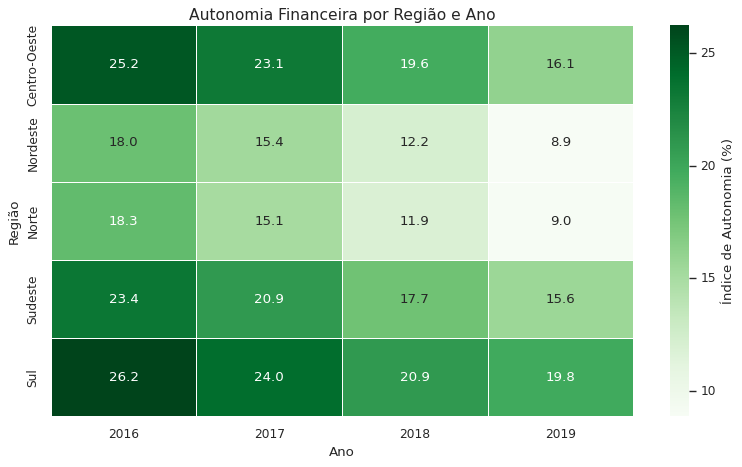

In [ ]:
pivot_table = dados.pivot_table(
    values='Indice_Autonomia',
    index='Regiao',
    columns='Ano',
    aggfunc='median'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    cmap='Greens',
    linewidths=0.5,
    cbar_kws={'label': 'Índice de Autonomia (%)'}
)
plt.title('Autonomia Financeira por Região e Ano', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Região')
plt.tight_layout()

O gráfico de calor mostra a evolução da autonomia financeira das regiões brasileiras entre 2016 e 2019. Observa-se uma tendência de queda na autonomia em todas as regiões ao longo dos anos, com Sul e Centro-Oeste mantendo os maiores índices, seguidos pelo Sudeste. As regiões Norte e Nordeste apresentam consistentemente os menores índices de autonomia. Em 2019, todas as regiões registraram seus piores valores, com o Sul (19,8%) ainda mantendo o melhor desempenho, enquanto o Nordeste atingiu apenas 8,9%. Essa disparidade regional reflete as desigualdades socioeconômicas do país, com as regiões mais industrializadas demonstrando maior capacidade de autofinanciamento municipal.

### Gráficos sobre Dependência de Transferências

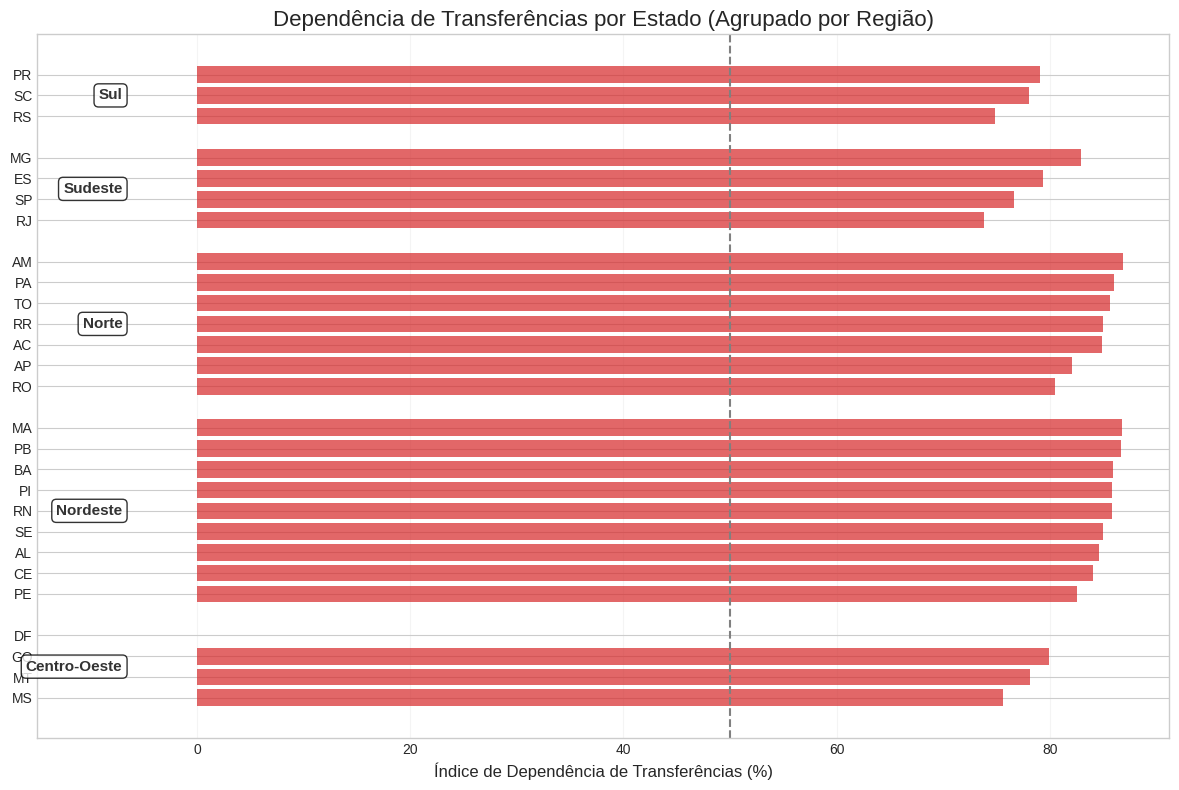

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


autonomia_uf_regiao = dados.groupby(['Regiao', 'UF'])['Dependencia_Transferencias'].median().reset_index()
autonomia_uf_regiao = autonomia_uf_regiao.sort_values(['Regiao', 'Dependencia_Transferencias'])


regioes = autonomia_uf_regiao['Regiao'].unique()
espaco = 1

y_pos = []
current_pos = 0
for regiao in regioes:
    ufs_regiao = autonomia_uf_regiao[autonomia_uf_regiao['Regiao'] == regiao]
    n_ufs = len(ufs_regiao)
    y_pos.extend(np.arange(current_pos, current_pos + n_ufs))
    current_pos += n_ufs + espaco

plt.figure(figsize=(12, 8))
bars = plt.barh(
    y=y_pos[:len(autonomia_uf_regiao)],
    width=autonomia_uf_regiao['Dependencia_Transferencias'],
    color='#d62728',
    alpha=0.7,
    height=0.8
)

for regiao in regioes:
    mask = autonomia_uf_regiao['Regiao'] == regiao
    indices = np.where(mask)[0]
    if len(indices) > 0:
        y_min = y_pos[indices[0]]
        y_max = y_pos[indices[-1]]
        y_center = (y_min + y_max) / 2

        plt.text(
            x=-7,
            y=y_center,
            s=regiao,
            ha='right',
            va='center',
            fontsize=11,
            fontweight='bold',
            color='#333333',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3')
        )

plt.yticks(
    ticks=y_pos[:len(autonomia_uf_regiao)],
    labels=autonomia_uf_regiao['UF'],
    fontsize=10
)

plt.title('Dependência de Transferências por Estado (Agrupado por Região)', fontsize=16)
plt.xlabel('Índice de Dependência de Transferências (%)', fontsize=12)
plt.ylabel('')
plt.axvline(x=50, color='gray', linestyle='--', label='50% Dependência')
plt.xlim(left=-15)
plt.grid(axis='x', alpha=0.2)

plt.subplots_adjust(left=0.25)
plt.tight_layout()
plt.show()

Ao analisar o gráfico, observa-se um padrão regional: estados do Nordeste e Norte apresentam os maiores índices de dependência, enquanto estados do Sul e Sudeste mostram índices relativamente menores.Esta visualização confirma as disparidades regionais no Brasil, onde estados economicamente menos desenvolvidos dependem mais intensamente de transferências intergovernamentais.

<ipython-input-160-9a2a756af600>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


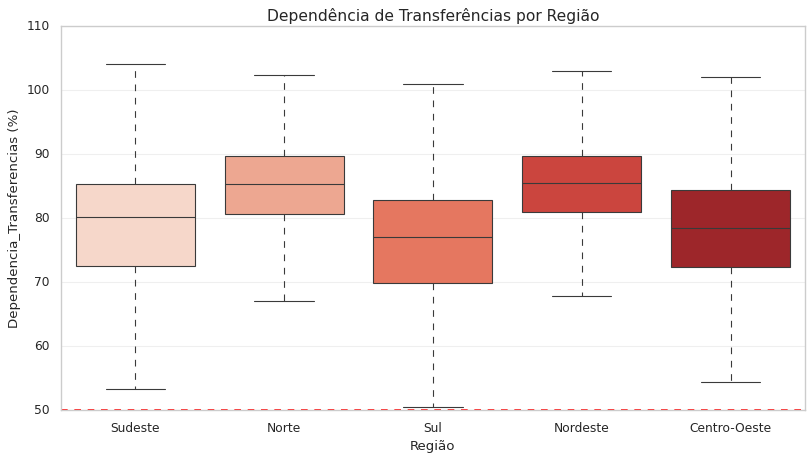

In [160]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=dados,
    x='Regiao',
    y='Dependencia_Transferencias',
    palette='Reds',
    showfliers=False  # Remove outliers para melhor visualização
)
plt.title('Dependência de Transferências por Região', fontsize=14)
plt.xlabel('Região')
plt.ylabel('Dependencia_Transferencias (%)')
plt.axhline(y=50, color='red', linestyle='--')
plt.grid(axis='y', alpha=0.3)

Analisando o boxplot, nota-se que as regiões Norte e Nordeste exibem as maiores medianas de dependência. O Sul destaca-se com a menor mediana, enquanto Sudeste e Centro-Oeste apresentam valores intermediários. Todas as regiões mostram grande amplitude nos dados, com valores máximos próximos a 100% e mínimos variando entre 50-70%. Este gráfico confirma o padrão de maior dependência nas regiões Norte e Nordeste e menor dependência no Sul, refletindo as desigualdades regionais.

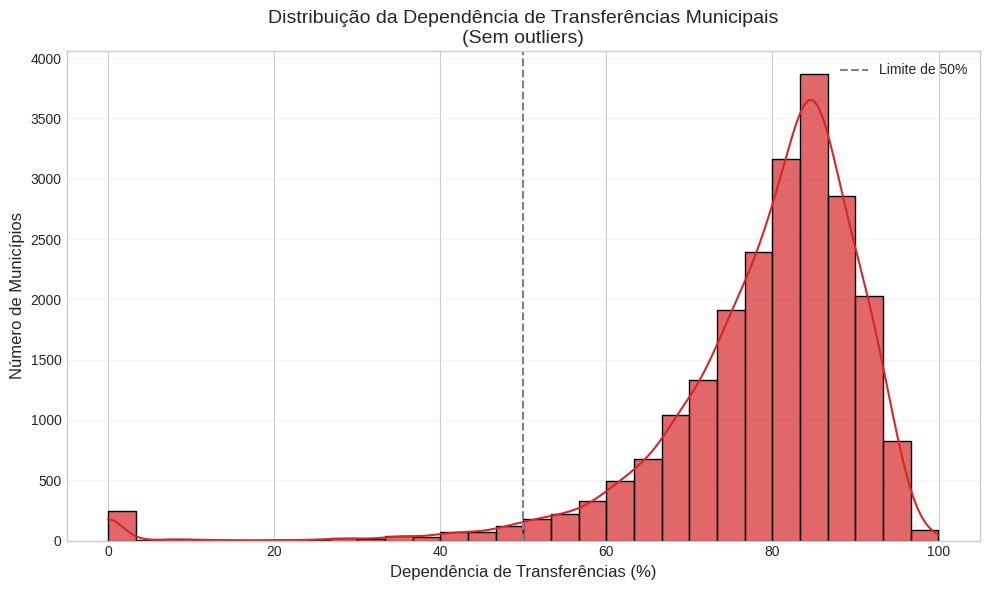

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=dados,
    x='Dependencia_Transferencias',
    bins=30,
    kde=True,
    color='#2e8b57'
)
plt.axvline(x=50, color='red', linestyle='--', label='Dependencia_Transferencias (50%)')
plt.title('Distribuição do Índice de Dependência de Transferências', fontsize=14)
plt.xlabel('Dependencia_Transferencias (%)')
plt.ylabel('Número de Municípios')
plt.legend()
plt.grid(alpha=0.3)



Nota-se que a maior concentração de municípios apresenta dependência entre 80-85% das suas receitas. Praticamente todos os municípios ultrapassam o limite de 50%, com a distribuição fortemente concentrada à direita. Observa-se um pequeno grupo de municípios com dependência baixa. A distribuição assimétrica à esquerda revela que a imensa maioria dos municípios brasileiros depende criticamente de transferências intergovernamentas.

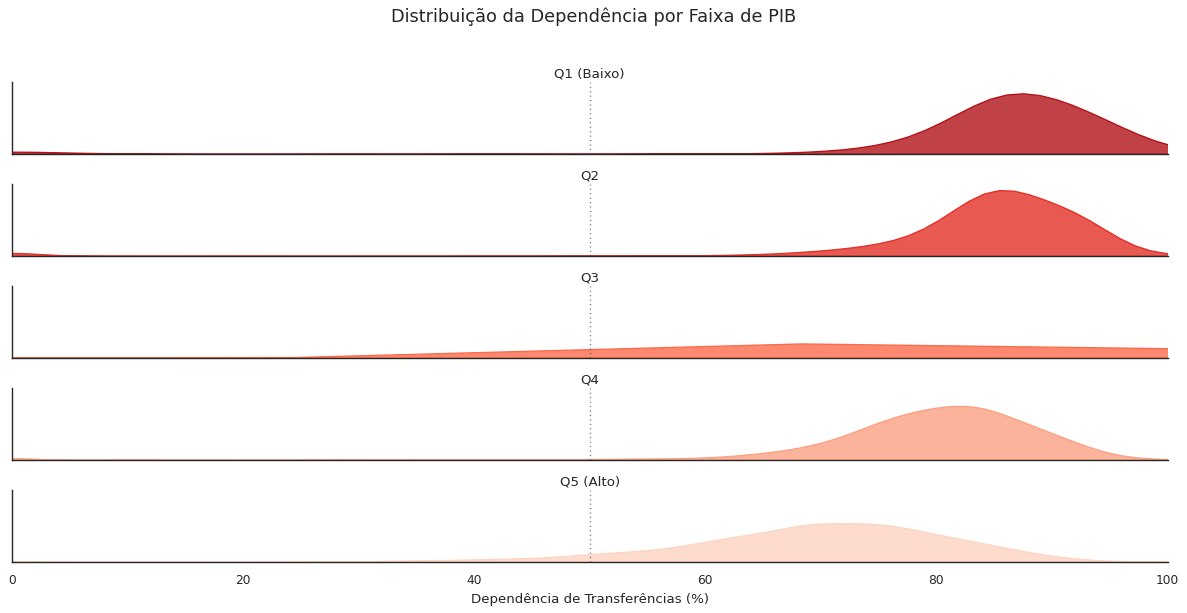

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dados['Faixa_PIB'] = pd.qcut(dados['PIB'],
                           q=5,
                           labels=['Q1 (Baixo)', 'Q2', 'Q3', 'Q4', 'Q5 (Alto)'])


g = sns.FacetGrid(
    dados,
    row='Faixa_PIB',
    hue='Faixa_PIB',
    aspect=10,
    height=1.5,
    palette='Reds_r',
    xlim=(0, 100)
)

g.map(sns.kdeplot, 'Dependencia_Transferencias',
     fill=True,
     alpha=0.8,
     linewidth=1.2)

def ref_line(x, **kwargs):
    plt.axvline(x=50, color='#333333', linestyle=':', linewidth=1.2, alpha=0.7)
g.map(ref_line, 'Dependencia_Transferencias')


g.fig.suptitle('Distribuição da Dependência por Faixa de PIB',
              y=1.02,
              fontsize=16,
              fontweight='normal')

g.set(
    ylabel="",
    xlabel="Dependência de Transferências (%)"
)
g.set_titles(row_template='{row_name}')
g.set(yticks=[])

plt.subplots_adjust(hspace=0.25)
plt.tight_layout()
plt.show()

Observa-se um padrão claro e inverso ao mostrado anteriormente para autonomia: quanto menor o PIB municipal, maior a dependência de transferências, com concentração entre 80-90%. À medida que o PIB aumenta, as distribuições se deslocam gradualmente para a esquerda, indicando menor dependência. Na faixa de PIB mais alta, a distribuição é mais ampla e centrada em valores menores, embora ainda significativos. A linha pontilhada vertical (50%) serve como referência, mostrando que a grande maioria dos municípios, mesmo os com maior PIB, mantém dependência acima desse limiar. Esta visualização confirma a relação inversa entre capacidade econômica e dependência de transferências intergovernamentais no contexto municipal brasileiro.

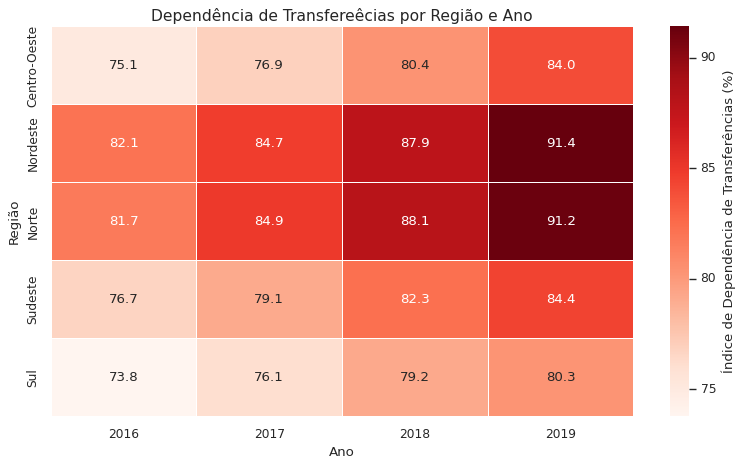

In [ ]:
pivot_table = dados.pivot_table(
    values='Dependencia_Transferencias',
    index='Regiao',
    columns='Ano',
    aggfunc='median'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    cmap='Reds',
    linewidths=0.5,
    cbar_kws={'label': 'Índice de Dependência de Transferências (%)'}
)
plt.title('Dependência de Transfereêcias por Região e Ano', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Região')
plt.tight_layout()

No gráfico, observa-se um aumento consistente na dependência em todas as regiões ao longo dos anos, com o Nordeste e a Região Norte apresentando os maiores índices. É possível notar que as regiões Norte e Nordeste demonstram maior dependência de transferências em comparação ao Centro-Oeste, Sudeste e Sul, sendo o Sul a região com os menores índices em todos os anos analisados.

#**Análise da Relação entre Exportações e Produção Agrícola e Pecuária**

Neste tópico, foi realizada uma análise sobre a relação entre as exportações e a produção agrícola e pecuária nos municípios. A partir dos dados disponíveis, investigou-se como o desempenho exportador impacta as atividades do agronegócio, com foco em entender se regiões com maior participação nas exportações também apresentam maior concentração de atividades ligadas à agricultura e pecuária. O estudo visa compreender a correlação entre esses fatores e como o agronegócio influencia as dinâmicas econômicas locais.

Para essa análise, foram ajustadas as variáveis para refletir corretamente as unidades de medida. O PIB foi convertido para unidades reais (R$) com a criação da variável "PIB_real". As áreas plantada e colhida foram ajustadas para metros quadrados, criando-se "AreaColhida_real" e "AreaPlantada_real". As produções agrícola e pecuária foram corrigidas para valores reais, criando as variáveis "ProducaoAgricola_real" e "ProducaoPecuaria_real". Com essas modificações, foram geradas estatísticas descritivas dessas variáveis, com formatação adequada para facilitar a visualização..

## Análise estatística e descritiva dos dados

In [103]:
import pandas as pd
import numpy as np

dados['PIB_real'] = dados['PIB'] * 1000
dados['AreaColhida_real'] = dados['AreaColhida_h'] * 10000
dados['AreaPlantada_real'] = dados['AreaPlantada_h'] * 10000
dados['ProducaoAgricola_real'] = dados['VlProducaoAgricola'] * 1000
dados['ProducaoPecuaria_real'] = dados['VlProducaoPecuaria'] * 1000


estatisticas = dados[['PIB_real', 'ProducaoPecuaria_real', 'ProducaoAgricola_real', 'AreaColhida_real', 'AreaPlantada_real', 'Exportacoes_US$']].describe()

estatisticas_formatadas = estatisticas.style \
    .format("{:,.2f}", na_rep="-") \
    .set_caption("Estatísticas Descritivas das Variáveis Econômicas e de Produção Ajustadas")

estatisticas_formatadas


,PIB_real,ProducaoPecuaria_real,ProducaoAgricola_real,AreaColhida_real,AreaPlantada_real,Exportacoes_US$
count,"33,420.00","33,420.00","33,420.00","33,420.00","33,420.00","33,420.00"
mean,"1,042,832,848.08","226,080.64","1,091,051.02","2,759,665.17","2,746,289.95","30,853,345.25"
std,"10,980,878,490.36","683,980.06","2,187,147.27","8,830,801.87","8,803,360.96","298,456,070.02"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,"48,886,250.00",0.00,"30,000.00",0.00,0.00,0.00
50%,"135,519,000.00","50,000.00","200,000.00","500,000.00","500,000.00",0.00
75%,"385,322,500.00","150,000.00","780,000.00","2,000,000.00","2,000,000.00","176,020.50"
max,"763,597,808,000.00","9,960,000.00","9,990,000.00","99,800,000.00","99,800,000.00","13,190,038,124.00"


Além disso, as estatísticas foram agrupadas por ano para verificar a presença de padrões. Em seguida, os valores foram analisados individualmente, de forma isolada, para uma compreensão mais aprofundada.

In [104]:
import pandas as pd
import numpy as np

# Ajuste nas variáveis
dados['PIB_real'] = dados['PIB'] * 1000
dados['AreaColhida_real'] = dados['AreaColhida_h'] * 10000
dados['AreaPlantada_real'] = dados['AreaPlantada_h'] * 10000
dados['ProducaoAgricola_real'] = dados['VlProducaoAgricola'] * 1000
dados['ProducaoPecuaria_real'] = dados['VlProducaoPecuaria'] * 1000

# Estatísticas descritivas por ano para as variáveis agrícolas
estatisticas_por_ano_agricola = dados.groupby('Ano')[
    ['PIB_real', 'ProducaoPecuaria_real', 'ProducaoAgricola_real', 'AreaColhida_real', 'AreaPlantada_real', 'Exportacoes_US$']
].describe().transpose()

# Formatação das estatísticas
estatisticas_por_ano_agricola_formatadas = estatisticas_por_ano_agricola.style \
    .format("{:,.2f}", na_rep="-") \
    .set_caption("Estatísticas Descritivas das Variáveis Econômicas e de Produção por Ano")

estatisticas_por_ano_agricola_formatadas


Em seguida, as varíáveis referentes à exportações, produção agrícola e pecuária foram agrupadas por região e analisadas em todos os anos a fim de encontrar alguma correlação

In [106]:
import pandas as pd

dados_agregados = dados.groupby(['Ano', 'Regiao'])[['Exportacoes_US$', 'ProducaoPecuaria_real', 'ProducaoAgricola_real']].sum().reset_index()
dados_agregados_ordenados = dados_agregados.sort_values(by=['Regiao', 'Ano'])

dados_agregados_ordenados


,Ano,Regiao,Exportacoes_US$,ProducaoPecuaria_real,ProducaoAgricola_real
0,2016,Centro-Oeste,7.620087e+09,120700000,945153000
5,2017,Centro-Oeste,8.233624e+09,109460000,853802000
10,2018,Centro-Oeste,8.925217e+09,125580000,911101000
15,2019,Centro-Oeste,9.113353e+09,151860000,1018929000
20,2020,Centro-Oeste,8.357146e+09,172150000,1137890000
25,2021,Centro-Oeste,1.493619e+10,184440000,1299924000
1,2016,Nordeste,1.755533e+10,142000000,542088000
6,2017,Nordeste,1.942025e+10,160820000,538928000
11,2018,Nordeste,2.169017e+10,191530000,537514000
16,2019,Nordeste,2.024908e+10,172900000,620104000


## Análise gráfica dos dados

A partir dos resultados encontrados na estatística descritiva, neste tópico serão apresentados alguns gráficos baseados nos dados analisados e nos resultados obtidos, com o objetivo de compreender suas correlações e iniciar o processo de resposta à pergunta levantada.

**Pergunta: Existe uma correlação entre as exportações e a produção agrícola e pecuária? Regiões com maior foco nas exportações também são aquelas com maior concentração de atividades do agronegócio?**

###Gráficos de Exportações, Produções Agrícola e Pecurária, e suas Relações


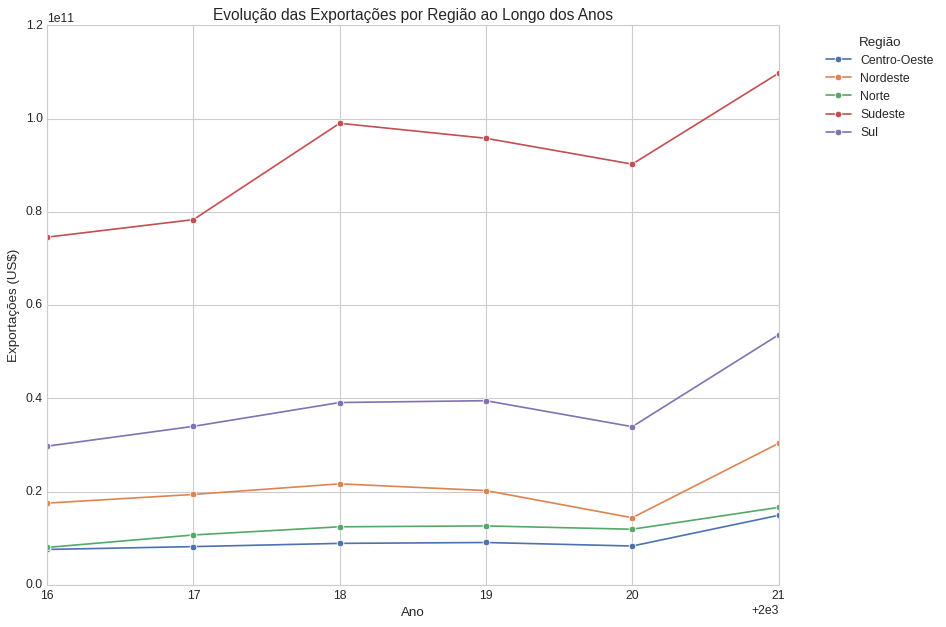

In [108]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=dados_agregados, x='Ano', y='Exportacoes_US$', hue='Regiao', marker='o')
plt.title('Evolução das Exportações por Região ao Longo dos Anos', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Exportações (US$)')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Analisando o gráfico, pode-se observar que A região Sudeste destaca-se claramente como a maior exportadora do país. A região Sul aparece em segundo lugar. Observa-se que todas as regiões apresentaram uma queda ou estagnação em torno de 2020, provavelmente refletindo o impacto da pandemia de COVID-19, seguida por uma recuperação significativa em 2021. As regiões Norte e Centro-Oeste mantiveram-se com os menores valores de exportação, embora ambas demonstrem crescimento no último ano analisado.

###Produção Agrícola

<ipython-input-152-3f79c5b39817>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
<ipython-input-152-3f79c5b39817>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


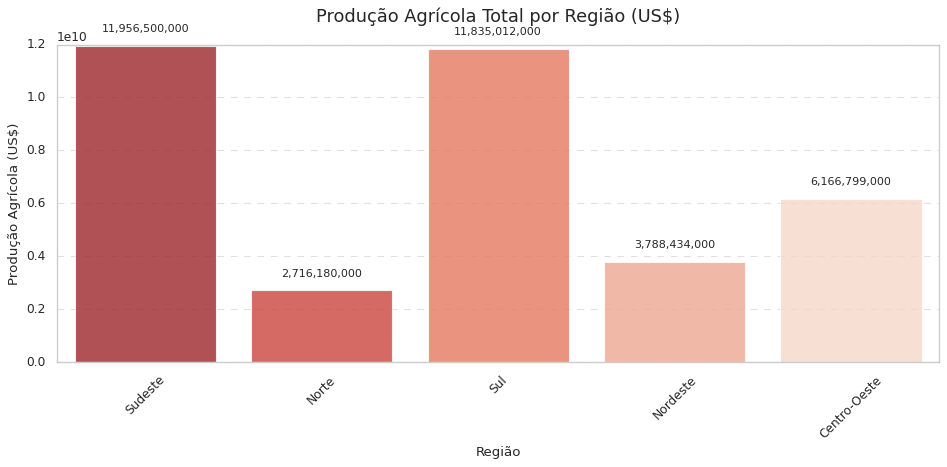

In [152]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=dados,
    x='Regiao',
    y='ProducaoAgricola_real',
    estimator=sum,
    palette='Reds_r',
    ci=None,
    alpha=0.8
)

plt.title('Produção Agrícola Total por Região (US$)', fontsize=16, pad=20)  # Aumente o 'pad' do título
plt.xlabel('Região', fontsize=12)
plt.ylabel('Produção Agrícola (US$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ajustar rótulos para dentro das barras ou posicioná-los mais acima
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 15),  # Aumente este valor para mover os rótulos mais para cima
        textcoords='offset points',
        fontsize=10
    )

plt.tight_layout()
plt.show()

Os valores da produção agrícola total evidenciam disparidades marcantes: Sudeste e Sul dominam o cenário com mais de 66% da produção nacional, enquanto o Centro-Oeste contribui com US$ 6,17 bilhões. O contraste com Nordeste e Norte reflete não apenas diferenças em condições naturais, mas também em investimentos, tecnologia e políticas de desenvolvimento regional.

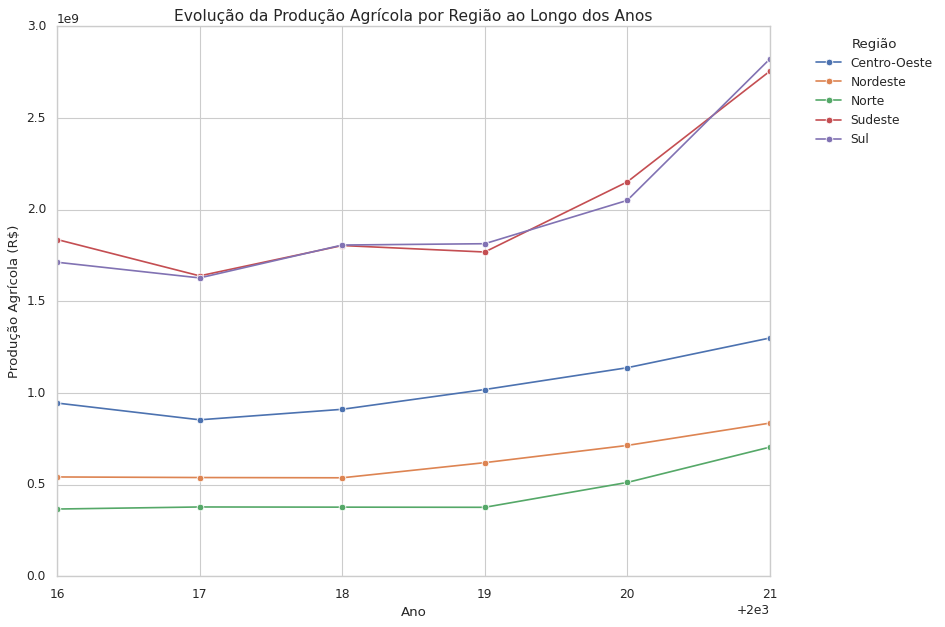

In [138]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=dados_agregados, x='Ano', y='ProducaoAgricola_real', hue='Regiao', marker='o')
plt.title('Evolução da Produção Agrícola por Região ao Longo dos Anos', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Produção Agrícola (R$)')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

A análise do gráfico revela um cenário de desigualdade produtiva persistente no setor agrícola brasileiro. Sul e Sudeste mantêm-se como potências agrícolas consolidadas, enquanto o Centro-Oeste demonstra um crescimento constante. Em 2019, todas as regiões iniciam uma trajetória ascendente, sugerindo possíveis mudanças nas políticas agrícolas ou condições favoráveis generalizadas. Por fim,nota-se distanciamento entre as regiões.

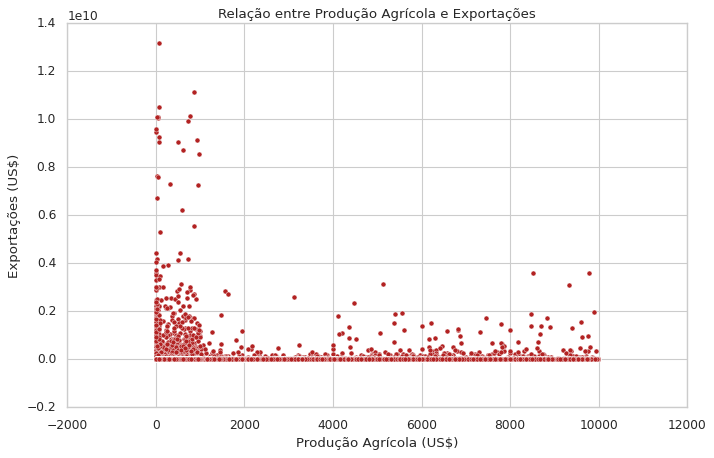

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=dados['VlProducaoAgricola'],
    y=dados['Exportacoes_US$'],
    color='firebrick'
)
plt.title('Relação entre Produção Agrícola e Exportações')
plt.xlabel('Produção Agrícola (US$)')
plt.ylabel('Exportações (US$)')
plt.grid(True)
plt.show()

O gráfico de dispersão apresenta uma concentração significativa de pontos próximos ao eixo vertical (baixa produção, mas exportações variadas), sugerindo que uma parte considerável das exportações ocorre mesmo com níveis relativamente baixos de produção agrícola. Observa-se também alguns pontos com valores muito altos de exportação (acima de US$ 10 bilhões) associados a valores baixos de produção agrícola. À medida que aumenta o valor da produção agrícola, nota-se uma dispersão menos densa de pontos, indicando que maiores volumes de produção não necessariamente se traduzem em maiores exportações.

<ipython-input-149-440851221617>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


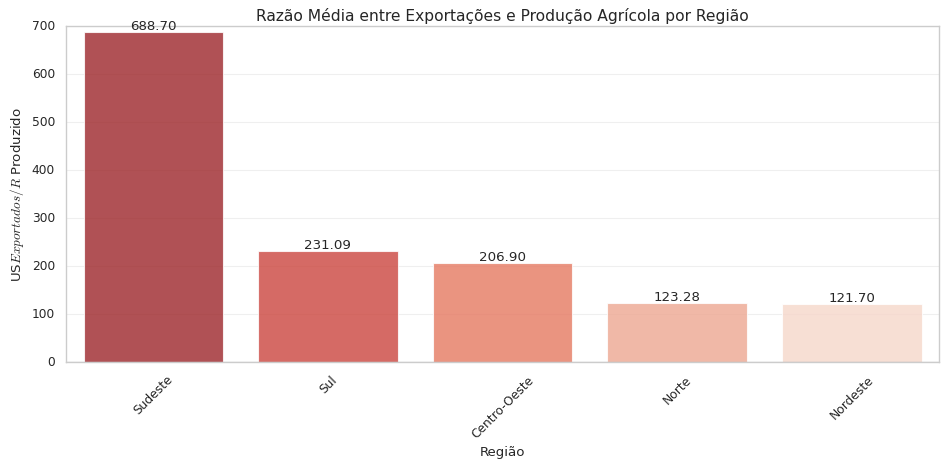

In [149]:

dados['Razao_Export_Agro'] = np.where(
    dados['ProducaoAgricola_real'] > 0,  # Só calcula se produção > 0
    dados['Exportacoes_US$'] / dados['ProducaoAgricola_real'],
    np.nan  # Ignora casos com produção zero
)


dados_razao = dados.dropna(subset=['Razao_Export_Agro']).groupby('Regiao')['Razao_Export_Agro'].mean().reset_index()

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=dados_razao.sort_values('Razao_Export_Agro', ascending=False),
    x='Regiao',
    y='Razao_Export_Agro',
    palette='Reds_r',
    alpha=0.8
)


for p in barplot.patches:
    barplot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 5), textcoords='offset points'
    )

plt.title('Razão Média entre Exportações e Produção Agrícola por Região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('US$ Exportados / R$ Produzido', fontsize=12)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

O gráfico destaca que o Sudeste consegue exportar 688,70 dólares para cada unidade produzida, muito acima das demais regiões. Sul e Centro-Oeste apresentam desempenho intermediário, enquanto Norte e Nordeste ficam com valores próximos entre si. Essa vantagem expressiva do Sudeste provavelmente reflete sua melhor infraestrutura logística, além de possível maior valor agregado nos produtos exportados.


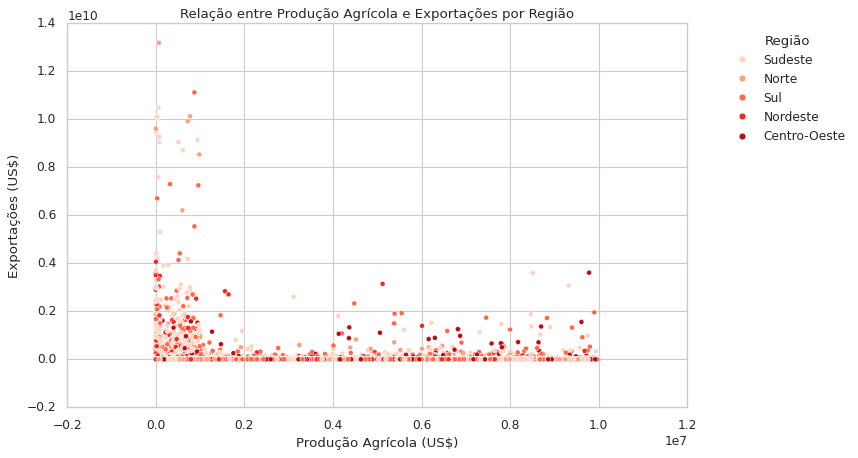

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='ProducaoAgricola_real', y='Exportacoes_US$', hue='Regiao', palette='Reds')
plt.title('Relação entre Produção Agrícola e Exportações por Região')
plt.xlabel('Produção Agrícola (US$)')
plt.ylabel('Exportações (US$)')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



O gráfico de dispersão da relação entre produção agrícola e exportações por região mostra uma concentração notável de altos valores de exportação associados a valores relativamente baixos de produção. Observa-se também uma dispersão dos pontos para todas as regiões em diferentes níveis de produção, embora com tendência de exportações mais baixas conforme a produção aumenta. Esta distribuição não-linear confirma que o volume de produção não é o único determinante das exportações.

###Produção Pecuária

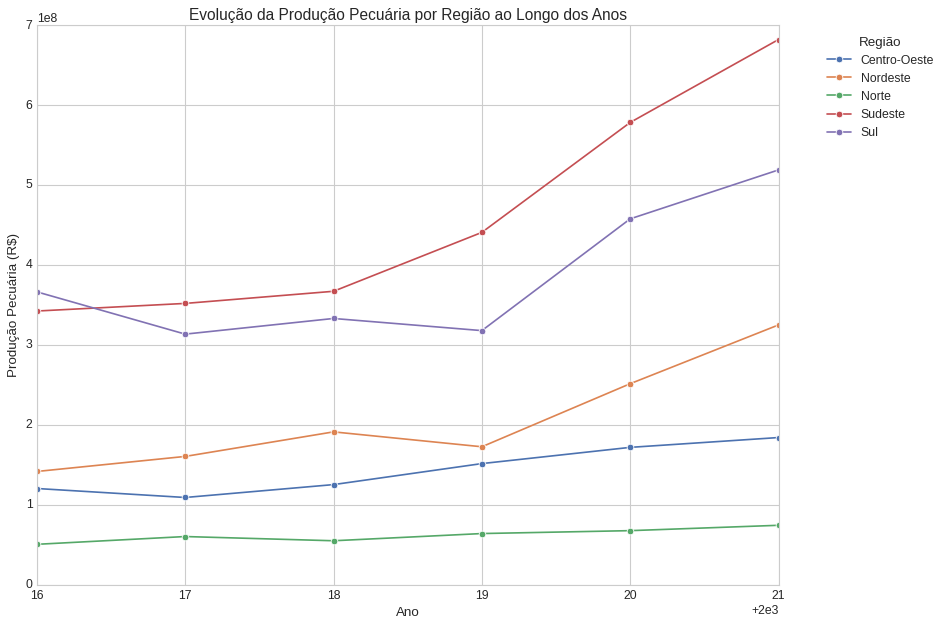

In [109]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=dados_agregados, x='Ano', y='ProducaoPecuaria_real', hue='Regiao', marker='o')
plt.title('Evolução da Produção Pecuária por Região ao Longo dos Anos', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Produção Pecuária (R$)')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

 Observa-se um crescimento expressivo e consistente da produção pecuária do Sudeste, após uma curva ascendente particularmente acentuada a partir de 2019. A região Sul, que inicialmente apresentava valores semelhantes ao Sudeste em 2016, teve um período de estagnação entre 2017 e 2019, seguido por uma recuperação significativa. O Nordeste demonstra crescimento moderado até 2020, quando acelera consideravelmente. As regiões Centro-Oeste e Norte mantêm-se nas posições inferiores durante todo o período, com crescimento mais discreto, evidenciando as disparidades regionais persistentes no setor pecuário brasileiro.

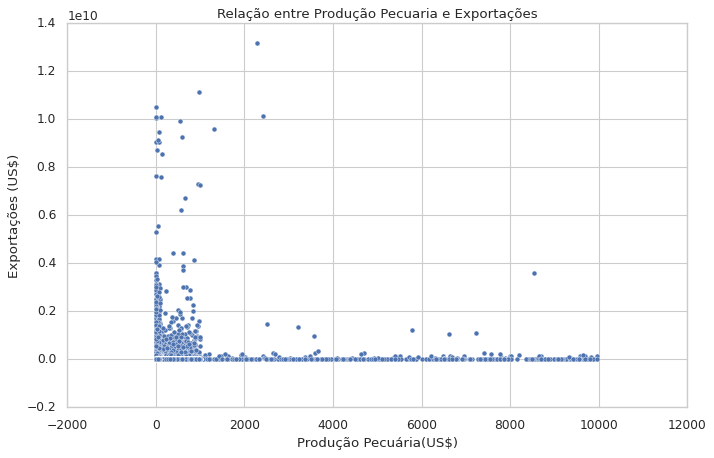

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=dados['VlProducaoPecuaria'], y=dados['Exportacoes_US$'])
plt.title('Relação entre Produção Pecuaria e Exportações')
plt.xlabel('Produção Pecuária(US$)')
plt.ylabel('Exportações (US$)')
plt.grid(True)
plt.show()


O gráfico apresenta um padrão semelhante ao da produção agrícola, com concentração de altos valores de exportação associados a baixos valores de produção pecuária. Notam-se diversos pontos com exportações significativas próximos ao eixo vertical. À medida que os valores de produção aumentam no eixo horizontal, as exportações tendem a se estabilizar em patamares mais baixos. O comportamento similar aos dados agrícolas sugere que tanto a produção agrícola quanto a pecuária seguem lógicas semelhantes na dinâmica entre produção e exportação no Brasil.

<ipython-input-153-a4dd896f1358>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-153-a4dd896f1358>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


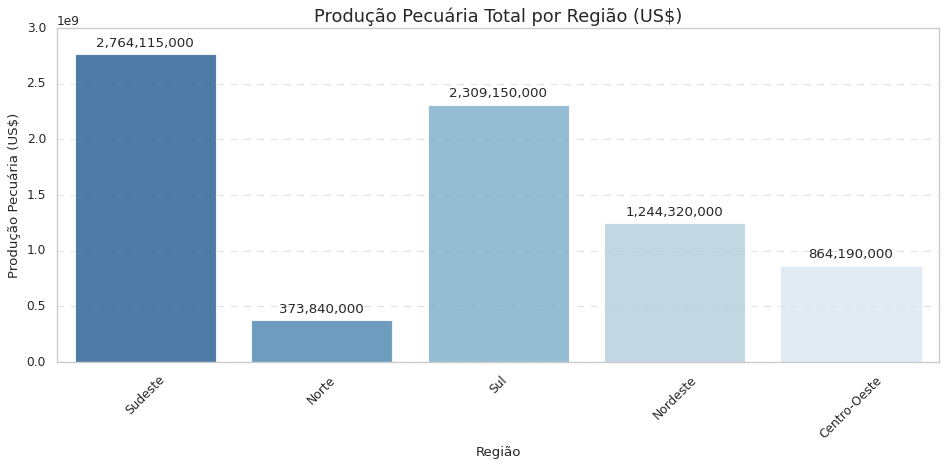

In [153]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=dados,
    x='Regiao',
    y='ProducaoPecuaria_real',
    estimator=sum,
    palette='Blues_r',
    ci=None,
    alpha=0.8
)
plt.title('Produção Pecuária Total por Região (US$)', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Produção Pecuária (US$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

O gráfico apresenta a produção pecuária total por região brasileira em valores absolutos (US).A região Sudeste lidera com um valore expressivo de U\$ 2,7 bilhões, seguida pela região Sul com U\$ 2,3 bilhões. O Nordeste ocupa a terceira posição, enquanto o Centro-Oeste e o Norte apresentam os menores valores, respectivamente. Esta distribuição evidencia uma concentração da produção pecuária nas regiões mais industrializadas do país (Sudeste e Sul), que juntas representam mais de 60% do valor total da produção pecuária nacional.

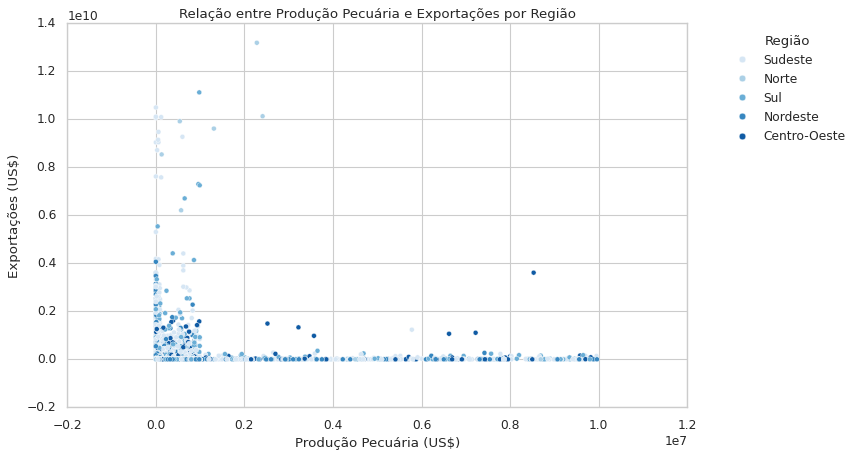

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='ProducaoPecuaria_real', y='Exportacoes_US$', hue='Regiao', palette='Blues')
plt.title('Relação entre Produção Pecuária e Exportações por Região')
plt.xlabel('Produção Pecuária (US$)')
plt.ylabel('Exportações (US$)')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Nota-se uma forte concentração de pontos próximos ao eixo vertical (produção pecuária baixa), mas com exportações variando bastante, incluindo valores muito altos. Isso sugere que, mesmo municípios com baixa produção pecuária podem registrar elevados valores de exportação. Em contrapartida, há poucos municípios que combinam alta produção pecuária com alta exportação, indicando que o volume bruto de produção pecuária não necessariamente se traduz em maior valor exportado.

<ipython-input-148-1bb47f84a0d8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


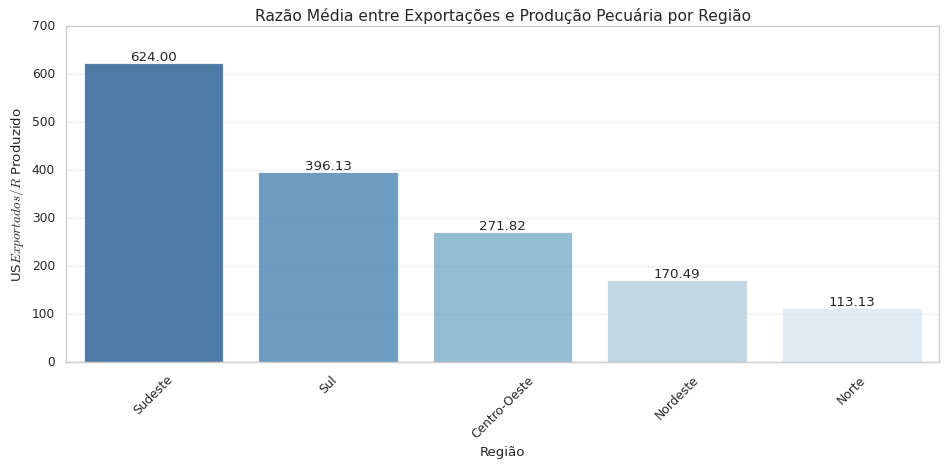

In [148]:

dados['Razao_Export_Agro'] = np.where(
    dados['ProducaoPecuaria_real'] > 0,  # Só calcula se produção > 0
    dados['Exportacoes_US$'] / dados['ProducaoPecuaria_real'],
    np.nan  # Ignora casos com produção zero
)

dados_razao = dados.dropna(subset=['Razao_Export_Agro']).groupby('Regiao')['Razao_Export_Agro'].mean().reset_index()

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=dados_razao.sort_values('Razao_Export_Agro', ascending=False),
    x='Regiao',
    y='Razao_Export_Agro',
    palette='Blues_r',
    alpha=0.8
)

for p in barplot.patches:
    barplot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 5), textcoords='offset points'
    )

plt.title('Razão Média entre Exportações e Produção Pecuária por Região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('US$ Exportados / R$ Produzido', fontsize=12)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observa-se que o Sudeste lidera com folga, apresentando a maior razão, seguido pelas regiões Sul e Centro-Oeste. As regiões Nordeste e Norte aparecem com valores bem inferiores. Esse resultado sugere que, proporcionalmente, o Sudeste é a região que mais converte sua produção pecuária em exportações, enquanto o Norte apresenta a menor eficiência relativa nesse aspecto.